<h1 style="color: white; 
    font-size: 46px; 
    text-align: center; 
    background: #00ccff; 
    padding: 30px; 
    ">Quality Report</h1>

In [1]:
#!pip install tensorflow==2.3.1

import tensorflow as tf
print('tensorflow == ', tf.__version__)
import numpy as np

tensorflow ==  2.3.1


In [2]:
#!pip install tensorflow_datasets

import tensorflow_datasets as tfds

In [3]:
from model_image import ModelImage
from functionality import FunctionalityAnalysis

# Image Binary Classification Model

In [4]:
model_path ='./saved_model/image-binary-classification-cats-vs-dogs'
data_tf = 'cats_vs_dogs'

In [5]:
model = ModelImage()
model.load_model(model_path = model_path)
model.load_data(data_tf = data_tf, test_samples=10)
y_pred, y_true = model.predict()

Model loaded! Input shape: (None, 224, 224, 3) , number of classes: 1
Data loaded!  <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>


Accuracy:   1.0 

Precision:  1.0
Recall:     1.0
F1 Score:   1.0


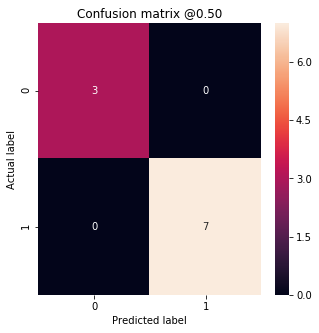

In [6]:
analysis = FunctionalityAnalysis(y_true, y_pred, 'binary classification')
analysis.evaluate_performance()

# Image Multiclass Classification Model

### - TF dataset

In [7]:
model_path ='./saved_model/image-multiclass-mnist-no-robust'
data_tf = 'mnist'

In [8]:
model = ModelImage()
model.load_model(model_path = model_path)
model.load_data(data_tf=data_tf, test_samples=10)
y_pred, y_true = model.predict()

Model loaded! Input shape: (None, 28, 28, 1) , number of classes: 10
Data loaded!  <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
analysis = FunctionalityAnalysis(y_true, y_pred, 'multiclass classification')
analysis.evaluate_performance()

### - Dataset from directory

In [ ]:
model_path = './saved_model/saved_model/flower_photos'
data_path = './datasets/flower_photos'

In [ ]:
model = ModelImage()
model.load_model(model_path = model_path)
model.load_data(data_dir = data_path, split = 0.01)
y_pred, y_true = model.predict()

In [ ]:
analysis = FunctionalityAnalysis(y_true, y_pred, 'multiclass classification')
analysis.evaluate_performance()